In [1]:
#Importing required libraries
import requests
import pandas as pd
import matplotlib.pyplot as plt
pd.__version__

'1.2.4'

# Fetching income group dataset using World bank API

In [2]:
# API url to get country information (with income level) in JSON format
api_url = 'http://api.worldbank.org/v2/country/all?per_page=400&format=json'

In [3]:
# Sending HTTP GET request to the API endpoint
response = requests.get(api_url)

In [4]:
# Extracting JSON data from the response object
df = response.json()[1]

In [5]:
# Initializing an empty dictionary to store country codes by income group
incomegroups = {
'Low income': [],
'Lower middle income': [],
'Upper middle income': [],
'High income': [],
'Aggregates': [],
'Not classified':[]
}

In [6]:
# Looping through the data to populate income_groups dictionary with country codes
for country in df:
    countrycode = country['iso2Code']
    income_group_classification = country['incomeLevel']['value']
    incomegroups[income_group_classification].append(countrycode)

# Fetching sanitation access data using World bank API

In [11]:
# Initializing an empty dictionary to store data by income group
df_by_income_group = {}

In [12]:
# Looping through the income_groups dictionary to fetch sanitation access data by country codes for each income group
for income_group, countrycodes in incomegroups.items():
    url = f'http://api.worldbank.org/v2/country/{";".join(countrycodes)}/indicator/SH.STA.BASS.ZS?format=json&date=1996:2023'
    response = requests.get(url)
    df1 = response.json()[1]
    df_by_income_group[income_group] = {'dates': [], 'values': []}
    for item in df1:
        country = item['country']['value']
        year = item['date']
        value = item['value']
        df_by_income_group[income_group]['dates'].append(year)
        df_by_income_group[income_group]['values'].append(value)

# Data cleaning and preprocessing

In [9]:
# Filtering out 'Not classified' and 'Aggregates' income groups from df_by_income_group dictionary
filtered_dict = {key: value for key, value in df_by_income_group.items() if key not in ('Not classified', 'Aggregates')}

# Filtering out None values from the dictionary
filtered_dict1 = {key: {k: v for k, v in value.items() if v is not None} for key, value in filtered_dict.items()}

# Convert filtered_dict1 into Pandas DataFrame
df = pd.DataFrame(columns=['Income Group', 'Year', 'Value'])
for income_group, data in filtered_dict1.items():
    years = data['dates']
    values = data['values']
    for date, value in zip(years, values):
        df = df.append({'Income Group': income_group, 'Year': date, 'Value': value}, ignore_index=True)
df = df.sort_values(by=['Income Group', 'Year'])

# Filtering out nan values from the dictionary
df = df.dropna()
grouped_df = df.groupby(['Income Group', 'Year']).mean().reset_index()


# Data Visualization

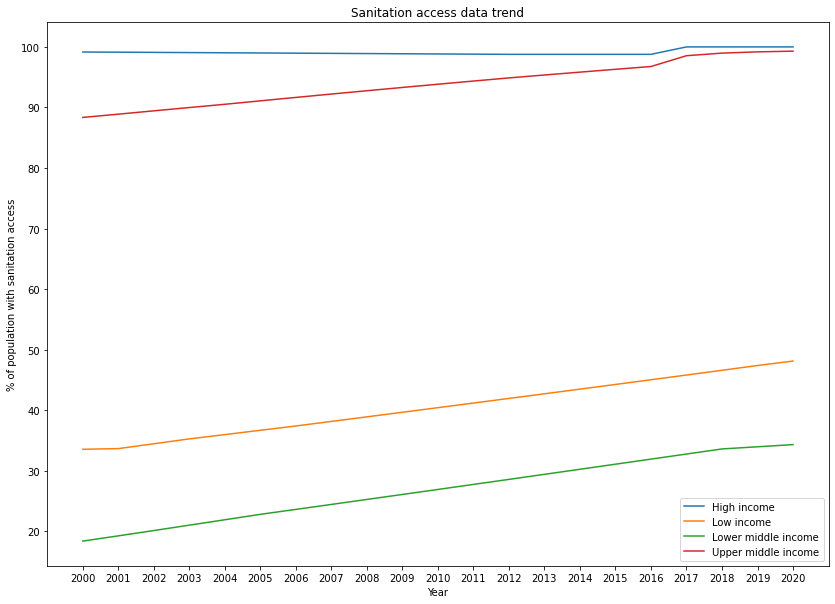

In [17]:
fig, ax = plt.subplots(figsize=(14,10))
for income_group, data in grouped_df.groupby('Income Group'):
    ax.plot(data['Year'], data['Value'], label=income_group)
plt.title("Sanitation access data trend")
ax.set_xlabel("Year")
ax.set_ylabel("% of population with sanitation access")
ax.legend()
# plt.savefig('C:/Users/Ammu/ET_technicalexercise/sanitation_access.png')
plt.show()

# Variation in sanitation access by income group over time

In [15]:
#Calculating percent change by income groups
min_year = df[df['Value']==df['Value'].min()]
max_year=df[df['Value']==df['Value'].max()]
start_year=min_year['Year'].values[0]
end_year=max_year['Year'].values[0]
percent_change_by_income_group = {}
for income_group, df2 in grouped_df.groupby('Income Group'):    
    start_value = df2[df2['Year']==start_year]['Value'].values[0]    
    end_value = df2[df2['Year']==end_year]['Value'].values[0]
    percent_change = ((end_value - start_value) / start_value) * 100
    percent_change_by_income_group[income_group] = percent_change

print("Percent_change_by_income_group by high Income group is " + str (percent_change_by_income_group['High income']))
print("Percent_change_by_income_group by upper middle income is " + str (percent_change_by_income_group['Upper middle income']))
print("Percent_change_by_income_group by Lower middle income is " + str (percent_change_by_income_group['Lower middle income']))
print("Percent_change_by_income_group by Low income is " + str (percent_change_by_income_group['Low income']))


Percent_change_by_income_group by high Income group is -0.13054943776296762
Percent_change_by_income_group by upper middle income is 2.4547792046695185
Percent_change_by_income_group by Lower middle income is 19.182793791694916
Percent_change_by_income_group by Low income is 7.2307467970929125
